In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
url="https://bit.ly/w-data"
data=pd.read_csv(url)

In [15]:
print(data.shape)
data.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [16]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


AttributeError: 'Line2D' object has no property 'colr'

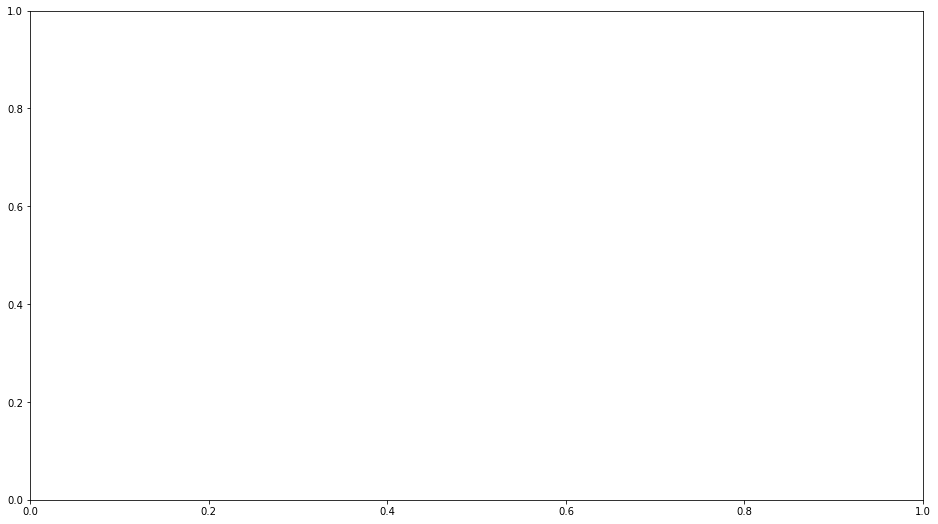

In [22]:
plt.rcParams["figure.figsize"]=[16,9]
data.plot(x='Hours',y='Scores',style='*',colr='black',markersize=8)
plt.title('Hours vs Percentage')
plt.grid()
plt.show()

In [23]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [24]:
hours=data['Hours']
scores=data['Scores']

C:\Users\tasheel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

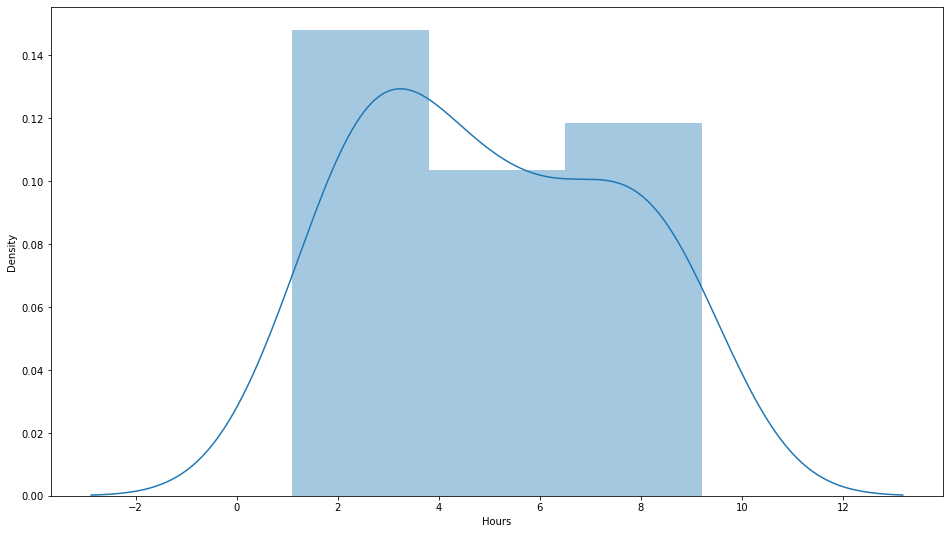

In [25]:
sns.distplot(hours)

C:\Users\tasheel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

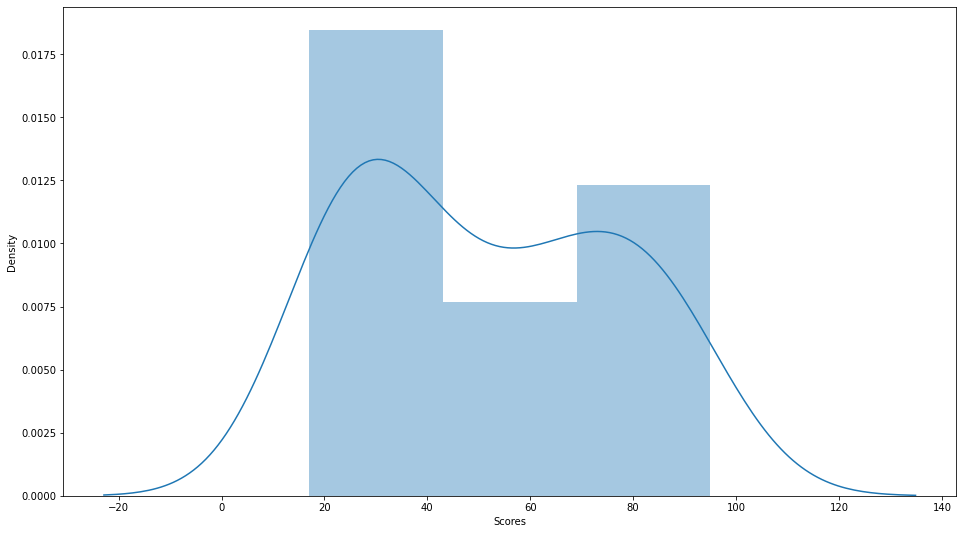

In [26]:
sns.distplot(scores)

In [27]:
x=data.iloc[:,:1].values
y=data.iloc[:,1:].values

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [29]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

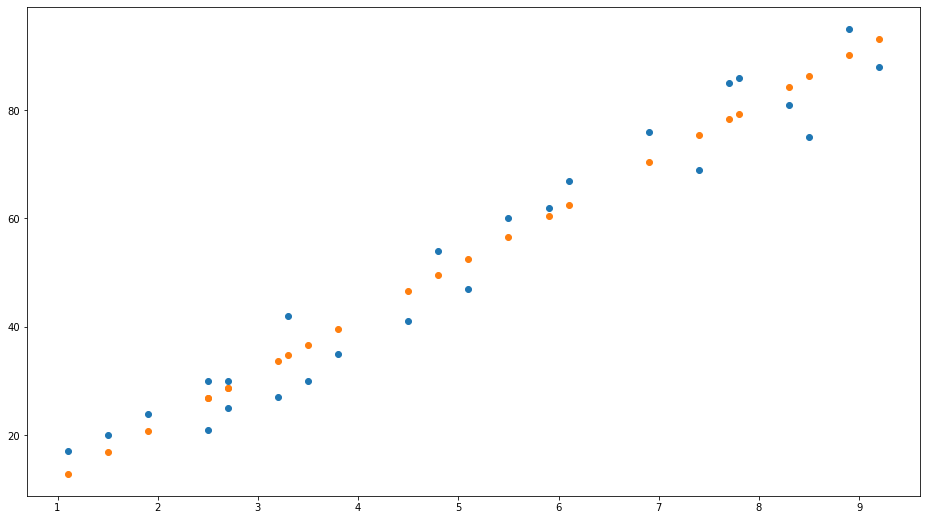

In [30]:
line=model.coef_*x+model.intercept_
plt.scatter(x,y)
plt.scatter(x,line)
plt.show()

In [31]:
y_pred=model.predict(x_test)

In [35]:
comp=pd.DataFrame({'Actual':[y_test],'Predicted':[y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62]]","[[16.884144762398027], [33.732260779489835], [..."


In [33]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62]], dtype=int64)

In [34]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

C:\Users\tasheel\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


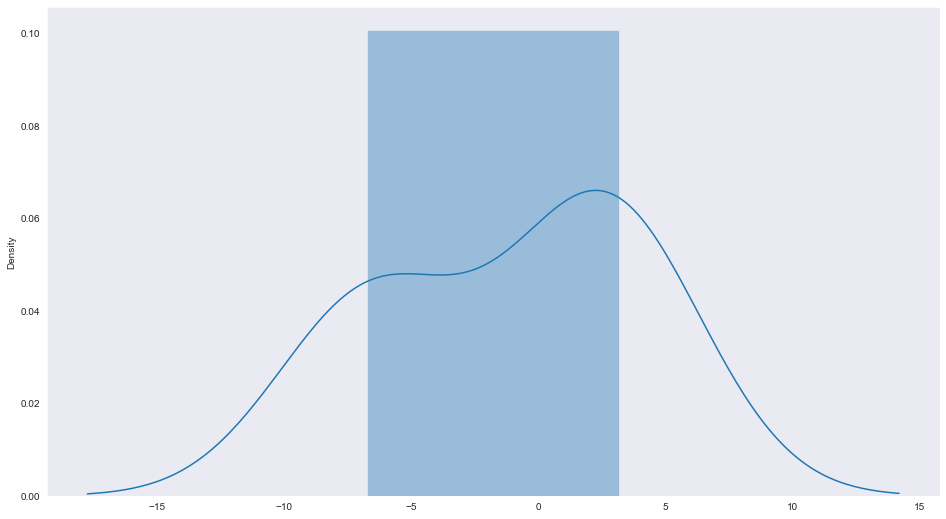

In [39]:
sns.set_style('dark')
sns.distplot(np.array(y_test-y_pred))
plt.show()

In [41]:
#Final Answer for our model

hours=9.25
answer=model.predict([[hours]])
print("The predicted score through this method for a student who studies for",hours,"hours","is",answer)

The predicted score through this method for a student who studies for 9.25 hours is [[93.69173249]]


In [46]:
#For Model Evaluation

from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred))

Mean Absolute Error: 4.18385989900298
R2 Score: 0.9454906892105355


In [47]:
print("With R^2 score of 0.945 it states that our model is predicting about 94.5% of the data, which is pretty good for this case.")

With R^2 score of 0.945 it states that our model is predicting about 94.5% of the data, which is pretty good for this case.


In [48]:
print("Thank You.")

Thank You.
